In [ ]:
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage


In [ ]:
pic=plt.imread('img2.jpg')/255   # here we normalize the values of image in btw 0 to 1 bcz Kmeans algo works under this range
pic.shape   # (Red, Green, Blue)

(183, 275, 3)

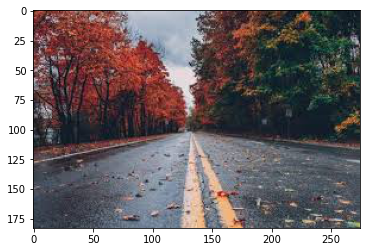

In [ ]:
plt.imshow(pic)

In [ ]:
#  dimesion of two one is showing color(R,G,B) and other one is pixels(club values are denoting the pixels)
pic_n=pic.reshape(pic.shape[0]*pic.shape[1],pic.shape[2])   
pic_n.shape


(50325, 3)

In [ ]:
pic_n

array([[0.57647059, 0.4       , 0.27843137],
       [0.34509804, 0.13333333, 0.02352941],
       [0.47843137, 0.21176471, 0.12156863],
       ...,
       [0.23137255, 0.26666667, 0.15294118],
       [0.2745098 , 0.30980392, 0.19607843],
       [0.33333333, 0.36078431, 0.23921569]])

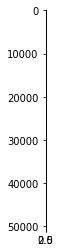

In [ ]:
plt.imshow(pic_n) # image converted one dimensional but colors are there(R,G,B) 

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=0).fit(pic_n)
pic2show=kmeans.cluster_centers_[kmeans.labels_]   # Here we label all the cluster centers s centroids

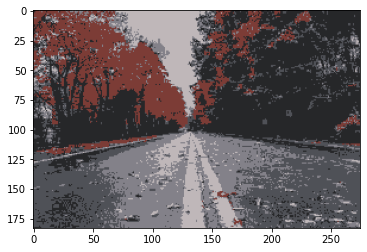

In [ ]:
cluster_pic=pic2show.reshape(pic.shape[0],pic.shape[1],pic.shape[2])
plt.imshow(cluster_pic)

# **Hierarchical Clustering implementation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
dataset = make_blobs(n_samples= 200,
                          n_features= 2,
                          centers= 4,
                          cluster_std = 1.6,
                          random_state = 50)

In [ ]:
data_points = dataset[0]

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


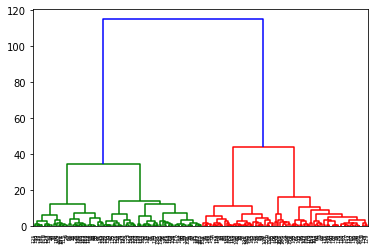

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(data_points,method='ward'))

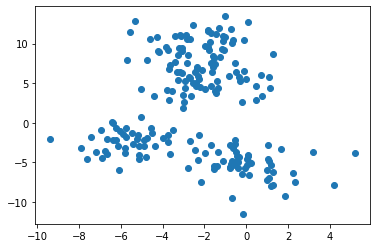

In [ ]:
plt.scatter(dataset[0][:,0], dataset[0][:,1])

In [ ]:
her_clus = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage='ward')

In [ ]:
y_her_clus = her_clus.fit_predict(data_points)

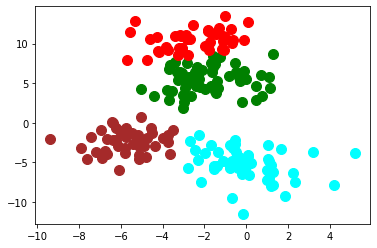

In [ ]:
plt.scatter(data_points[y_her_clus== 0,0], data_points[y_her_clus== 0,1], s= 100, c='cyan')
plt.scatter(data_points[y_her_clus== 1,0], data_points[y_her_clus== 1,1], s= 100, c='green')
plt.scatter(data_points[y_her_clus== 2,0], data_points[y_her_clus== 2,1], s= 100, c='brown')
plt.scatter(data_points[y_her_clus== 3,0], data_points[y_her_clus== 3,1], s= 100, c='red')

# **Elbow Clustering**

### **To get the best number of cluster by this method**

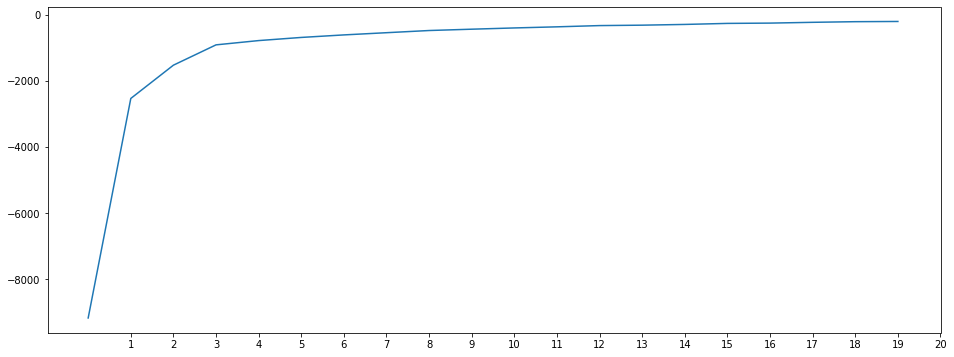

In [ ]:
n_cluster= range(1,21)
kmeans= [KMeans(n_clusters=i).fit(data_points) for i in n_cluster]
scores= [kmeans[i].score(data_points) for i in range(len(kmeans))]

f= plt.figure(1, figsize=(16,6))
plt.plot(scores)
_=plt.xticks(n_cluster)

### **Getting the best number of clusters based on the elbow method, where the difference between scores is smaller than the 90% percentile**

In [ ]:
scores= np.array(scores)
dif_scores= scores/scores[0]
dif_scores= np.diff(dif_scores)
n_clusters= np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
print(n_clusters)

17


In [ ]:
predss = KMeans(n_clusters=n_clusters).fit_predict(data_points)
print(f"First observation's cluster: {predss[0]}")

First observation's cluster: 13
